In [126]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
def genGaussianSamples(N,m,C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    
    return (U @ A.T + m)

#Define three means
#
Means = np.array([[0,3], [3,0], [4,4]])

#Define three covariance matrices ensuring
#they are positive definite
#
from sklearn.datasets import make_spd_matrix
CovMatrices = np.zeros((3,2,2))
for j in range(3):
    CovMatrices[j,:,:] = make_spd_matrix(2)

#Priors
#
w = np.random.rand(3)
w = w / np.sum(w)

#How many data in each component (1000 in total)
#
nData = np.floor(w*1000).astype(int)

#Draw samples from each component
#with
X0 = genGaussianSamples(nData[0], Means[0,:], CovMatrices[0,:,:])
X1 = genGaussianSamples(nData[1], Means[1,:], CovMatrices[1,:,:])
X2 = genGaussianSamples(nData[2], Means[2,:], CovMatrices[2,:,:])
print(nData[0])
print(nData[1])
print(nData[2])
print(CovMatrices[0,:,:])
print(CovMatrices[1,:,:])
print(CovMatrices[2,:,:])

366
328
304
[[ 2.29523532 -0.72076555]
 [-0.72076555  0.86262083]]
[[1.97850662 0.82261592]
 [0.82261592 0.79297596]]
[[ 2.29365694 -0.44330296]
 [-0.44330296  0.49592859]]


K-means

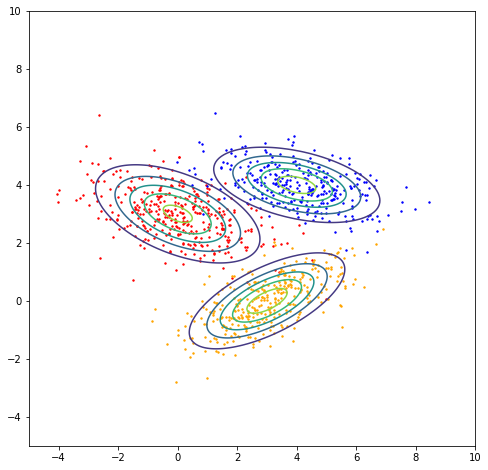

In [159]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
NumDataPerClass = 1000
# Two-class problem, distinct means, equal covariance matrices
#
m0 = np.array([0, 3])
m1 = np.array([3, 0])
m2 = np.array([4, 4])
C0 = CovMatrices[0,:,:]
C1 = CovMatrices[1,:,:]
C2 = CovMatrices[2,:,:]
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A0 = np.linalg.cholesky(C0)
A1 = np.linalg.cholesky(C1)
A2 = np.linalg.cholesky(C2)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X0[:,0], X0[:,1], c="red", s=2)
ax.scatter(X1[:,0], X1[:,1], c="orange", s=2)
ax.scatter(X2[:,0], X2[:,1], c="blue", s=2)
ax.set_xlim(-5,10)
ax.set_ylim(-5,10)

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci,(x-m))))
    den = 2 * np.pi * math.sqrt(dC)
    
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-10, 10, nx)
    y = np.linspace(-10, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
            
    return X, Y, Z

Xc0, Yc0, Zc0 = twoDGaussianPlot (nData[0], nData[0], m0, C0)
Xc1, Yc1, Zc1 = twoDGaussianPlot (nData[1], nData[1], m1, C1)
Xc2, Yc2, Zc2 = twoDGaussianPlot (nData[2], nData[2], m2, C2)
plt.contour(Xc0, Yc0, Zc0, 5)
plt.contour(Xc1, Yc1, Zc1, 5)
plt.contour(Xc2, Yc2, Zc2, 5)
plt.savefig("Distribution Cotours.png")

(998, 2)
[[-1.07557285  3.33396656]
 [-1.24440817  3.51205247]
 [-0.62323447  2.80936498]
 ...
 [ 3.7164754   3.37947459]
 [ 4.5311361   3.8732218 ]
 [ 5.16029987  4.17697296]]


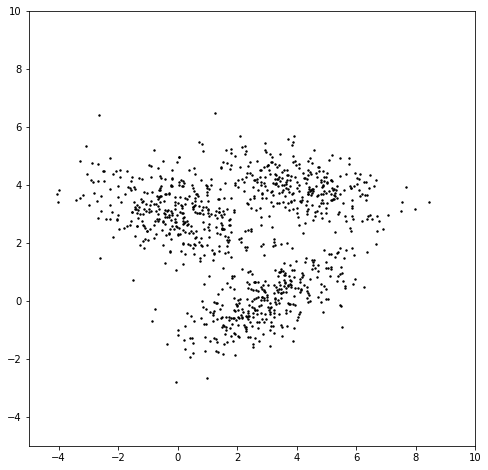

In [654]:
#Append into an arrayfor the data we need
#
XX = np.append(np.append(X0,X1,axis = 0), X2, axis = 0)
print(XX.shape)
print(XX)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(XX[:,0], XX[:,1], c="black", s=2)
ax.set_xlim(-5,10)
ax.set_ylim(-5,10)
plt.savefig("Data Distribution.png")

[[-0.93872024  3.66211304]
 [-3.36488619  1.01052544]
 [-1.47104336  1.33994043]]
(3, 2)
0
[[[-0.9387202441299016, 3.662113036689952]], [], [], [], [], [], [], [], []]
[[[-3.3648861943406034, 1.0105254433911748]], [], [], [], [], [], [], [], []]
[[[-1.4710433646553396, 1.3399404343435126]], [], [], [], [], [], [], [], []]
[[ 2.15302734  3.49620852]
 [-3.61366699  3.17181504]
 [ 2.38265405  0.11361368]]
(3, 2)
1
[[[-0.9387202441299016, 3.662113036689952]], [[2.153027339467949, 3.4962085151537314]], [], [], [], [], [], [], []]
[[[-3.3648861943406034, 1.0105254433911748]], [[-3.613666989081122, 3.1718150351262273]], [], [], [], [], [], [], []]
[[[-1.4710433646553396, 1.3399404343435126]], [[2.382654048218565, 0.1136136782538877]], [], [], [], [], [], [], []]
[[ 2.58695074  3.54251325]
 [-1.76247426  3.36565781]
 [ 2.87825182  0.05034435]]
(3, 2)
2
[[[-0.9387202441299016, 3.662113036689952]], [[2.153027339467949, 3.4962085151537314]], [[2.5869507402943297, 3.542513245421985]], [], [], [], 

(-5.0, 10.0)

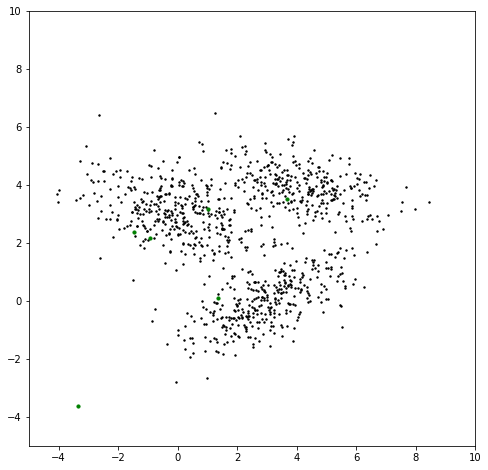

In [232]:
# K-means Iterations Created
from numpy import *
from math import sqrt

# Calculate Euclidean Distance
def distElud(vecA,vecB):
    return sqrt(sum(power((vecA - vecB),2)))

# Initialize Clustering Centers
def randCent(dataSet,k):
    n = shape(dataSet)[1]
    center = mat(zeros((k,n)))
    for j in range(n):
        rangeJ = float(max(dataSet[:,j]) - min(dataSet[:,j]))
        center[:,j] = min(dataSet[:,j]) + rangeJ * random.rand(k,1)
    return center

def kMeans(dataSet,k,dist = distElud,createCent = randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    center = createCent(dataSet,k)
    clusterChanged = True
    Ca = []
    Cb = []
    Cc = []
    literations = 0
    for l in range(9):
        Ca.append([])
        Cb.append([])
        Cc.append([])
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJI = dist(dataSet[i,:],center[j,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            # Set Convergence Condition
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist ** 2
        print(center)
        print(center.shape)
        print(literations)
        Ca[literations] = center[0].tolist()
        Cb[literations] = center[1].tolist()
        Cc[literations] = center[2].tolist()
        print(Ca)
        print(Cb)
        print(Cc)
        literations = literations + 1
        # Updata Cluster Centers
        for cent in range(k):
            dataCent = dataSet[nonzero(clusterAssment[:,0].A == cent)[0]]
            center[cent,:] = mean(dataCent,axis = 0)#axis是普通的将每一列相加，而axis=1表示的是将向量的每一行进行相加
    return center,clusterAssment,Ca,Cb,Cc

dataSet = XX
k = 3
a,b,c,d,e = kMeans(dataSet,k)

print(a)
print(b)
print(c)
print(d)
print(e)

[array([[4.30685968, 3.74383287]]), array([[-0.21910871,  3.19517804]]), array([[ 2.82920564, -0.01530745]])]


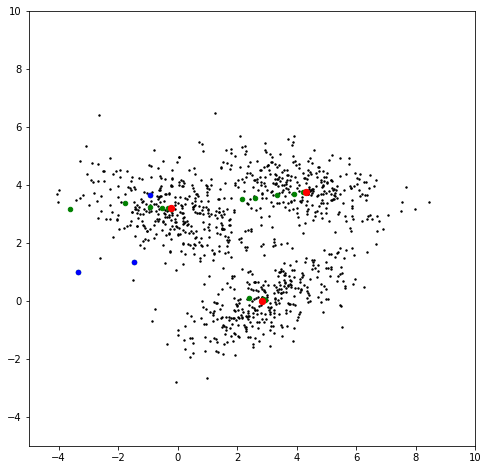

In [306]:
a0 = []
for i in range(3):
    a0.append(np.array(a[i]))
print(a0)
a1 = [x for z in a0 for y in z for x in y]
c1 = [x for z in c for y in z for x in y]
d1 = [x for z in d for y in z for x in y]
e1 = [x for z in e for y in z for x in y]
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(XX[:,0], XX[:,1], c="black", s=2)
for i in range(0,18,2):
    ax.scatter(c1[i], c1[i+1], c="green", s=20)
    ax.scatter(d1[i], d1[i+1], c="green", s=20)
    ax.scatter(e1[i], e1[i+1], c="green", s=20)   
    
ax.scatter(c1[0], c1[1], c="blue", s=20)
ax.scatter(d1[0], d1[1], c="blue", s=20)
ax.scatter(e1[0], e1[1], c="blue", s=20)  

for i in range(0,6,2):
    ax.scatter(a1[i],a1[i+1],c="red", s=40)
ax.set_xlim(-5,10)
ax.set_ylim(-5,10)
plt.savefig("Convergency.png")


In [568]:
# K-means Iterations Created
from numpy import *
from math import sqrt

# Calculate Euclidean Distance
def distElud(vecA,vecB):
    return sqrt(sum(power((vecA - vecB),2)))

def kMeans(dataSet,k,dist = distElud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    center = np.mat([[-30.000,30.000],
                     [30.000,-30.000],
                     [30.000,30.000]])
    clusterChanged = True
    Ca = []
    Cb = []
    Cc = []
    literations = 0
    for l in range(20):
        Ca.append([])
        Cb.append([])
        Cc.append([])
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJI = dist(dataSet[i,:],center[j,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            # Set Convergence Condition
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist ** 2
        print(center)
        print(center.shape)
        print(literations)
        Ca[literations] = center[0].tolist()
        Cb[literations] = center[1].tolist()
        Cc[literations] = center[2].tolist()
        print(Ca)
        print(Cb)
        print(Cc)
        literations = literations + 1
        # Updata Cluster Centers
        for cent in range(k):
            dataCent = dataSet[nonzero(clusterAssment[:,0].A == cent)[0]]
            center[cent,:] = mean(dataCent,axis = 0)#axis是普通的将每一列相加，而axis=1表示的是将向量的每一行进行相加
    return center,clusterAssment,Ca,Cb,Cc

dataSet0 = XX
k = 3
ak,b0,c0,d0,e0 = kMeans(dataSet0,k)

print(ak)
print(b0)
print(c0)
print(d0)
print(e0)


[[-30.  30.]
 [ 30. -30.]
 [ 30.  30.]]
(3, 2)
0
[[[-30.0, 30.0]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[[30.0, -30.0]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[[30.0, 30.0]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[-1.19018047  3.24936124]
 [ 2.26733298 -0.72851465]
 [ 3.19029362  2.81091941]]
(3, 2)
1
[[[-30.0, 30.0]], [[-1.190180469269334, 3.249361242894326]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[[30.0, -30.0]], [[2.267332981619676, -0.7285146542014589]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[[30.0, 30.0]], [[3.1902936179641737, 2.8109194076387825]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[-0.60710572  3.25177661]
 [ 2.53103456 -0.29467821]
 [ 3.8362949   3.26494645]]
(3, 2)
2
[[[-30.0, 30.0]], [[-1.190180469269334, 3.249361242894326]], [[-0.6071057167239728, 3.25

[array([[-0.21910871,  3.19517804]]), array([[ 2.82920564, -0.01530745]]), array([[4.30685968, 3.74383287]])]


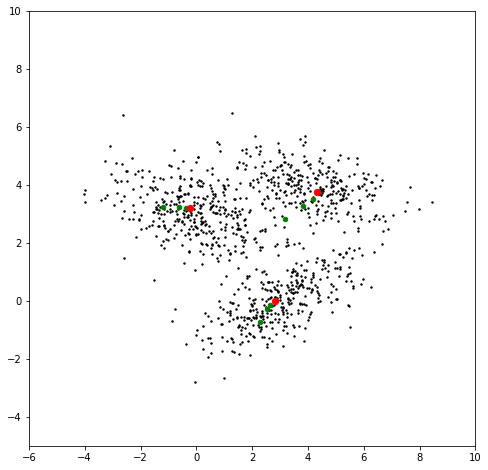

In [582]:
ag = []
for i in range(3):
    ag.append(np.array(ak[i]))
print(ag)
af = [x for z in ag for y in z for x in y]
cf = [x for z in c0 for y in z for x in y]
df = [x for z in d0 for y in z for x in y]
ef = [x for z in e0 for y in z for x in y]
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(XX[:,0], XX[:,1], c="black", s=2)
for i in range(0,7,2):
    ax.scatter(cf[i], cf[i+1], c="green", s=20)
    ax.scatter(df[i], df[i+1], c="green", s=20)
    ax.scatter(ef[i], ef[i+1], c="green", s=20)   
    
ax.scatter(cf[0], cf[1], c="blue", s=20)
ax.scatter(df[0], df[1], c="blue", s=20)
ax.scatter(ef[0], ef[1], c="blue", s=20)  

for i in range(0,6,2):
    ax.scatter(af[i],af[i+1],c="red", s=40)
ax.set_xlim(-6,10)
ax.set_ylim(-5,10)
plt.savefig("ConvergencyFail.png")

KMeans(n_clusters=2, random_state=0)
2 2
[[ 3.63632301  1.78300693]
 [-0.12184626  3.1358944 ]]
5002.165034794147


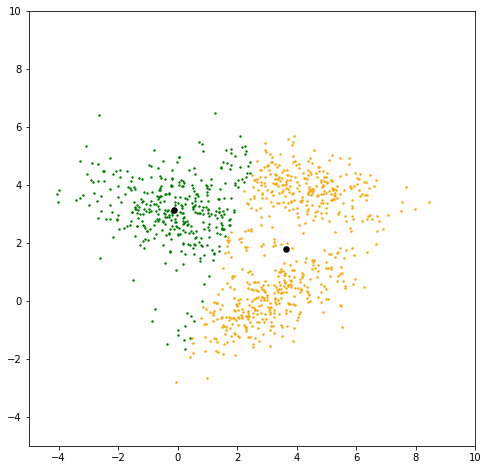

In [588]:
# K-means Clustering in sklearn
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt 
from sklearn import cluster
from sklearn import metrics
N_cluster = 2
model_kmeans = cluster.KMeans(N_cluster, random_state = 0)
Me = model_kmeans.fit(XX)
y_pre = model_kmeans.predict(XX)
centers = model_kmeans.cluster_centers_ 
print(Me)
q,w = centers.shape
print(q,w)
print(centers)
colors = ['orange','green']
fig, ax = plt.subplots(figsize=(8,8))
for i in range(N_cluster):
    index_sets = np.where(y_pre == i)
    cluster = XX[index_sets]
    ax.scatter(cluster[:,0],cluster[:,1], c = colors[i], s = 2)
    ax.scatter(centers[i][0], centers[i][1], c = 'black', s = 30 )
ax.set_xlim(-5,10)
ax.set_ylim(-5,10)
plt.savefig("ConvergencyFail2.png")
inertias = model_kmeans.inertia_
print(inertias)

KMeans(n_clusters=3, random_state=0)
3 2
[[ 2.82920564 -0.01530745]
 [ 4.30685968  3.74383287]
 [-0.21910871  3.19517804]]
2454.4261224799566


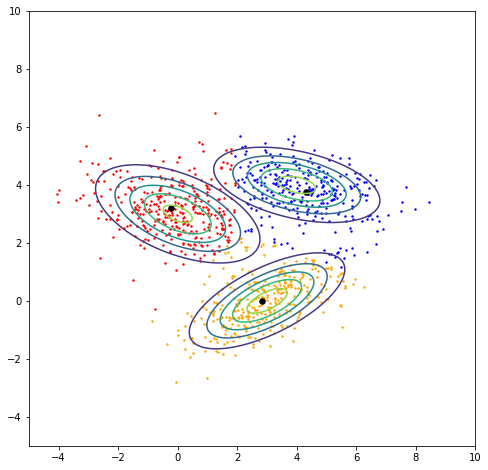

In [583]:
# K-means Clustering in sklearn
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt 
from sklearn import cluster
from sklearn import metrics
N_cluster = 3
model_kmeans = cluster.KMeans(N_cluster, random_state = 0)
Me = model_kmeans.fit(XX)
y_pre = model_kmeans.predict(XX)
centers = model_kmeans.cluster_centers_ 
print(Me)
q,w = centers.shape
print(q,w)
print(centers)
colors = ['orange','blue','red']
fig, ax = plt.subplots(figsize=(8,8))
for i in range(N_cluster):
    index_sets = np.where(y_pre == i)
    cluster = XX[index_sets]
    ax.scatter(cluster[:,0],cluster[:,1], c = colors[i], s = 2)
    ax.scatter(centers[i][0], centers[i][1], c = 'black', s = 30 )
ax.set_xlim(-5,10)
ax.set_ylim(-5,10)

Xc0, Yc0, Zc0 = twoDGaussianPlot (nData[0], nData[0], m0, C0)
Xc1, Yc1, Zc1 = twoDGaussianPlot (nData[1], nData[1], m1, C1)
Xc2, Yc2, Zc2 = twoDGaussianPlot (nData[2], nData[2], m2, C2)
plt.contour(Xc0, Yc0, Zc0, 5)
plt.contour(Xc1, Yc1, Zc1, 5)
plt.contour(Xc2, Yc2, Zc2, 5)

plt.savefig("Convergency2.png")

inertias = model_kmeans.inertia_
print(inertias)

K-means Application

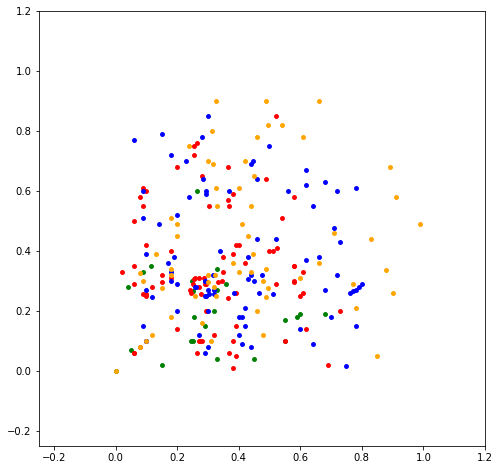

In [684]:
import matplotlib.pyplot as plt
# LoadDataSet
data = xlrd.open_workbook(r'Users.xls')
table = data.sheets()[0]
x1x = []
x1y = []
y1S = []
x2x = []
x2y = []
y2S = []
x3x = []
x3y = []
y3S = []
x4x = []
x4y = []
y4S = []
for row in range(1,table.nrows):
    x1.append(table.cell_value(row,0))
    x2.append(table.cell_value(row,1))
    Level = table.cell_value(row,5)
    if Level == 'very_low':
        x1x.append(table.cell_value(row,0))
        x1y.append(table.cell_value(row,1))
        y1S.append(0)
    elif Level == 'Low':
        x2x.append(table.cell_value(row,0))
        x2y.append(table.cell_value(row,1))
        y2S.append(1)
    elif Level == 'Middle':
        x3x.append(table.cell_value(row,0))
        x3y.append(table.cell_value(row,1))
        y3S.append(2)
    elif Level == 'High':
        x4x.append(table.cell_value(row,0))
        x4y.append(table.cell_value(row,1))
        y4S.append(3)
N = len(y)
Data = np.zeros((N,2),dtype = float)
for i in range(len(y)):
        Data[i][0] = x1[i]
        Data[i][1] = x2[i]
fig, ax = plt.subplots(figsize=(8,8))
for i in range(len(y1S)):
    ax.scatter(x1x[i],x1y[i], c = 'green', s = 15)
for i in range(len(y2S)):
    ax.scatter(x2x[i],x2y[i], c = 'red', s = 15)
for i in range(len(y3S)):
    ax.scatter(x3x[i],x3y[i], c = 'blue', s = 15)
for i in range(len(y4S)):
    ax.scatter(x4x[i],x4y[i], c = 'orange', s = 15)
ax.set_xlim(-0.25,1.2)
ax.set_ylim(-0.25,1.2)
plt.savefig("SampleDistribution.png")

KMeans(n_clusters=4, random_state=0)
4 2
[[0.69446    0.32502   ]
 [0.35493    0.23852   ]
 [0.34094828 0.67103448]
 [0.1153     0.25482   ]]
6.634557525862065


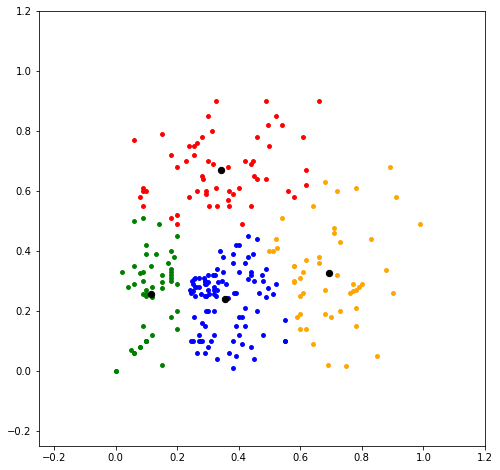

In [686]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd

# LoadDataSet
data = xlrd.open_workbook(r'Users.xls')
table = data.sheets()[0]
x1 = []
x2 = []
y = []
for row in range(1,table.nrows):
    x1.append(table.cell_value(row,0))
    x2.append(table.cell_value(row,1))
    Level = table.cell_value(row,5)
    if Level == 'very_low':
        y.append(0)
    elif Level == 'Low':
        y.append(1)
    elif Level == 'Middle':
        y.append(2)
    elif Level == 'High':
        y.append(3)
N = len(y)
Data = np.zeros((N,2),dtype = float)
for i in range(len(y)):
        Data[i][0] = x1[i]
        Data[i][1] = x2[i]
# print(Data)
# print(Data.shape)      

# K-means Clustering in sklearn
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt 
from sklearn import cluster
from sklearn import metrics
N_cluster = 4
model_kmeans = cluster.KMeans(N_cluster, random_state = 0)
SampleMeans = model_kmeans.fit(Data)
y_pre = model_kmeans.predict(Data)
SampleCenters = model_kmeans.cluster_centers_ 
print(SampleMeans)
q,w = SampleCenters.shape
print(q,w)
print(SampleCenters)
colors = ['orange','blue','red',"green"]
fig, ax = plt.subplots(figsize=(8,8))
for i in range(N_cluster):
    indexS = np.where(y_pre == i)
    clusterS = Data[indexS]
    ax.scatter(clusterS[:,0],clusterS[:,1], c = colors[i], s = 15)
    ax.scatter(SampleCenters[i][0], SampleCenters[i][1], c = 'black', s = 40 )
ax.set_xlim(-0.25,1.2)
ax.set_ylim(-0.25,1.2)

# Xc0, Yc0, Zc0 = twoDGaussianPlot (nData[0], nData[0], m0, C0)
# Xc1, Yc1, Zc1 = twoDGaussianPlot (nData[1], nData[1], m1, C1)
# Xc2, Yc2, Zc2 = twoDGaussianPlot (nData[2], nData[2], m2, C2)
# plt.contour(Xc0, Yc0, Zc0, 5)
# plt.contour(Xc1, Yc1, Zc1, 5)
# plt.contour(Xc2, Yc2, Zc2, 5)

plt.savefig("SampleConvergency.png")

inertias = model_kmeans.inertia_
print(inertias)


Data Generation

[425 251 322]
(998, 2)
(998,)


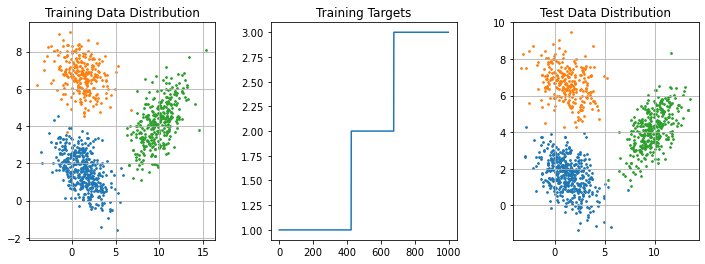

In [404]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# genGaussianSaamples
#
def genGaussianSamples(N,m,C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    
    return (U @ A.T + m)

NClasses = 3

# Priors
#
o = np.random.rand(3)
o = o / np.sum(o)
Ntotal = 1000
NPrior1 = np.floor(o * Ntotal).astype(int)
print(NPrior1)

Scale = 10
Meanx1 = Scale*np.random.rand(NClasses,2)
CovMatrix1 = np.zeros((NClasses,2,2))
for j in range(NClasses):
    CovMatrix1[j,:,:] = make_spd_matrix(2)
    
AllData_train1 = list()
for j in range(NClasses):
    AllData_train1.append(genGaussianSamples(NPrior1[j], Meanx1[j,:], CovMatrix1[j,:,:]))
    
X_train1 = AllData_train1[0]
y_train1 = np.ones((NPrior1[0],1))
for j in range(NClasses-1):
    Xj1 = genGaussianSamples(NPrior1[j+1], Meanx1[j+1,:], CovMatrix1[j+1,:,:])
    X_train1 = np.append(X_train1, Xj1, axis = 0)
    yj1 = (j+2)*np.ones((NPrior1[j+1],1))
    y_train1= np.append(y_train1, yj1)

print(X_train1.shape)
print(y_train1.shape)

AllData_test1 = list()
for j in range(NClasses):
    AllData_test1.append(genGaussianSamples(NPrior1[j], Meanx1[j,:], CovMatrix1[j,:,:]))
    
X_test1 = AllData_test1[0]
y_test1 = np.ones((NPrior1[0],1))
for j in range(NClasses-1):
    Xj1 = genGaussianSamples(NPrior1[j+1], Meanx1[j+1,:], CovMatrix1[j+1,:,:])
    X_test1 = np.append(X_test1, Xj1, axis = 0)
    yj1 = (j+2)*np.ones((NPrior1[j+1],1))
    y_test1 = np.append(y_test1, yj1)    

fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3)
for j in range(NClasses):
    Xplt1 = AllData_train1[j]
    ax[0].scatter(Xplt1[:,0], Xplt1[:,1], s = 3)
ax[0].grid(True)
ax[0].set_title("Training Data Distribution")

ax[1].plot(y_train1)
ax[1].set_title("Training Targets")

for j in range(NClasses):
    Xplt1 = AllData_test1[j]
    ax[2].scatter(Xplt1[:,0], Xplt1[:,1], s = 3)
ax[2].grid(True)
ax[2].set_title("Test Data Distribution")
plt.savefig("Samples of MLP1.png")

In [420]:
#Encoding the output
#
from sklearn.preprocessing import OneHotEncoder

onehot_encoder1 = OneHotEncoder(sparse = False)
y_onehot_train1 = onehot_encoder.fit_transform(y_train1.reshape(-1,1))
print(X_train1.shape)
print(y_onehot_train1.shape)

#Training  neural network
#
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(max_iter=10000)
clf1.fit(X_train1, y_onehot_train1)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred_train1 = clf1.predict(X_train1)
print(accuracy_score(y_onehot_train1, y_pred_train1))

N_train1 = X_train1.shape[0]
predicted_class_train1 = np.zeros((N_train1,1))
for j in range(N_train1):
    predicted_class_train1[j] = (1+np.argmax(y_pred_train1[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train1,predicted_class_train1))

y_onehot_test1 = onehot_encoder.fit_transform(y_test1.reshape(-1,1))
print(clf1.score(X_test1, y_onehot_test1))
print(clf1.n_iter_)
print(clf1.loss_)
print(clf1.out_activation_)

(998, 2)
(998, 3)
0.9979959919839679
Confusion Matrix:
[[424   0   1]
 [  0 251   0]
 [  1   0 321]]
0.9979959919839679
340
0.015891137009616488
logistic


In [432]:
#Training  Baysian Classifier
#
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
import numpy as np

blc1 = GaussianNB()
blc1.fit(X_train1, y_train1)

blc1.set_params(priors=[0.4258517, 0.25150301, 0.32264529])# Prior Probability
print(blc1.priors)                           # Probability List
print(blc1.class_prior_ )                    # Probability Array
print(blc1.get_params(deep=True))            # Dictionary of Priors and Para
 
print(blc1.class_count_)                     # Training Amout
print(blc1.theta_)                           # Mean
print(blc1.sigma_)                           # Variance

# print(blc1.predict(X_test1))
# print(blc1.predict_proba(X_test1))
# print(blc1.predict_log_proba(X_test1))
# print(accuracy_score(y_test1,blc1.predict(X_test1)))

[0.4258517, 0.25150301, 0.32264529]
[0.4258517  0.25150301 0.32264529]
{'priors': [0.4258517, 0.25150301, 0.32264529], 'var_smoothing': 1e-09}
[425. 251. 322.]
[[1.22924782 1.60750645]
 [1.15653004 6.74122922]
 [9.70668564 4.27461571]]
[[2.5315222  0.99644443]
 [2.82818288 1.16717616]
 [1.84528518 1.19649377]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

[115 187 696]
(999, 2)
(999,)


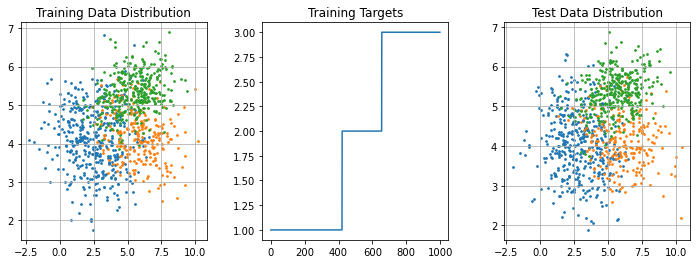

In [384]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# genGaussianSaamples
#
def genGaussianSamples(N,m,C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    
    return (U @ A.T + m)

NClasses = 3

# Priors
#
o = np.random.rand(3)
o = o / np.sum(o)
Ntotal = 1000
NPrior2 = np.floor(o * Ntotal).astype(int)
print(NPrior)

Scale = 10
Meanx2 = Scale*np.random.rand(NClasses,2)
CovMatrix2 = np.zeros((NClasses,2,2))
for j in range(NClasses):
    CovMatrix2[j,:,:] = make_spd_matrix(2)
    
AllData_train2 = list()
for j in range(NClasses):
    AllData_train2.append(genGaussianSamples(NPrior2[j], Meanx2[j,:], CovMatrix2[j,:,:]))
    
X_train2 = AllData_train2[0]
y_train2 = np.ones((NPrior2[0],1))
for j in range(NClasses-1):
    Xj2 = genGaussianSamples(NPrior2[j+1], Meanx2[j+1,:], CovMatrix2[j+1,:,:])
    X_train2 = np.append(X_train2, Xj2, axis = 0)
    yj2 = (j+2)*np.ones((NPrior2[j+1],1))
    y_train2 = np.append(y_train2, yj2)

print(X_train2.shape)
print(y_train2.shape)

AllData_test2 = list()
for j in range(NClasses):
    AllData_test2.append(genGaussianSamples(NPrior2[j], Meanx2[j,:], CovMatrix2[j,:,:]))
    
X_test2 = AllData_test2[0]
y_test2 = np.ones((NPrior2[0],1))
for j in range(NClasses-1):
    Xj2 = genGaussianSamples(NPrior2[j+1], Meanx2[j+1,:], CovMatrix2[j+1,:,:])
    X_test2 = np.append(X_test2, Xj2, axis = 0)
    yj2 = (j+2)*np.ones((NPrior2[j+1],1))
    y_test2 = np.append(y_test2, yj2)    

fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3)
for j in range(NClasses):
    Xplt2 = AllData_train2[j]
    ax[0].scatter(Xplt2[:,0], Xplt2[:,1], s = 3)
ax[0].grid(True)
ax[0].set_title("Training Data Distribution")

ax[1].plot(y_train2)
ax[1].set_title("Training Targets")

for j in range(NClasses):
    Xplt2 = AllData_test2[j]
    ax[2].scatter(Xplt2[:,0], Xplt2[:,1], s = 3)
ax[2].grid(True)
ax[2].set_title("Test Data Distribution")
plt.savefig("Samples of MLP2.png")


        

MLP Classifier

In [756]:
#Encoding the output
#
from sklearn.preprocessing import OneHotEncoder

onehot_encoder2 = OneHotEncoder(sparse = False)
y_onehot_train2 = onehot_encoder.fit_transform(y_train2.reshape(-1,1))
print(X_train2.shape)
print(y_onehot_train2.shape)

#Training  neural network
#
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(max_iter=10000, hidden_layer_sizes=(1000,1000))
clf2.fit(X_train2, y_onehot_train2)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred_train2 = clf2.predict(X_train2)
print(accuracy_score(y_onehot_train2, y_pred_train2))

N_train2 = X_train2.shape[0]
predicted_class_train2 = np.zeros((N_train2,1))
for j in range(N_train2):
    predicted_class_train2[j] = (1+np.argmax(y_pred_train2[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,predicted_class_train2))

y_onehot_test2 = onehot_encoder.fit_transform(y_test2.reshape(-1,1))
print(clf2.score(X_test2, y_onehot_test2))
print(clf2.n_iter_)
print(clf2.loss_)
print(clf2.out_activation_)

(999, 2)
(999, 3)
0.7837837837837838
Confusion Matrix:
[[373  15  33]
 [ 43 154  37]
 [ 46  17 281]]
0.7717717717717718
70
0.8355861465040162
logistic


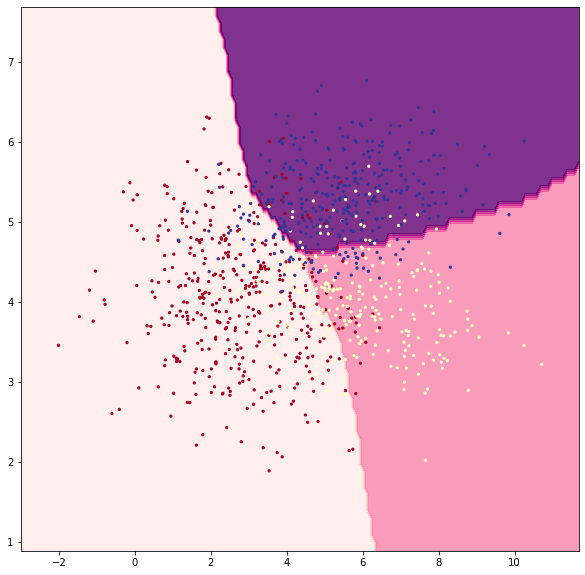

In [757]:
# def plot_multiclass_decision_boundary(model, X, y):
#     x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
#     y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
#     cmap = plt.cm.Spectral
#     X_test = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
#     y_pred = model(X_test, apply_softmax=True)
#     _, y_pred = y_pred.max(dim=1)
#     y_pred = y_pred.reshape(xx.shape)
#     plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())

# # X_train1.shape
# # y_pred_train1.shape
# border_of_classifier(clf2,X_test2,y_test2)
# plt.savefig("MLPClass1.png")
def class_boundary(X, y, model):
    model.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Plotting
    cmap = plt.cm.Spectral
    fig, ax = plt.subplots(figsize=(10,10))
    ax.contourf(xx, yy, Z, alpha=0.8,cmap = plt.get_cmap('RdPu'))
    plt.scatter(X[:,0], X[:,1], c=y, s=5,linewidth = 1,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
class_boundary(X_test2,y_test2,clf2)
plt.savefig("MLPClass1.png")

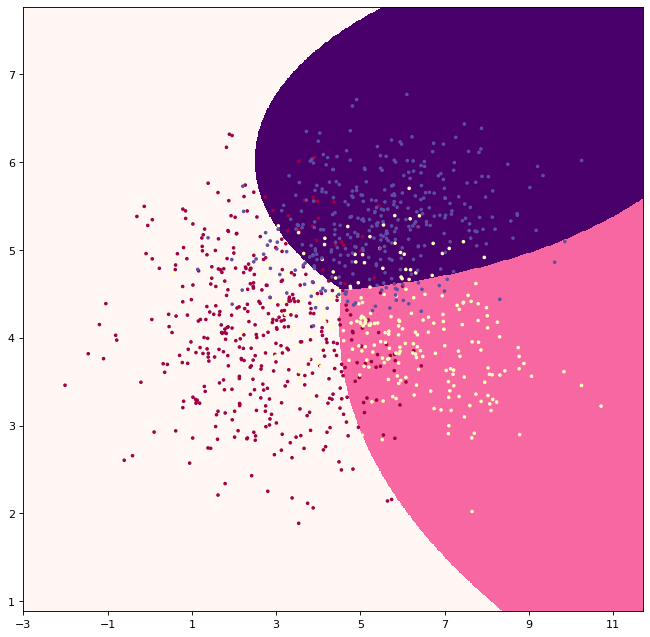

<Figure size 432x288 with 0 Axes>

In [737]:
def border_of_classifier(sklearn_cl, x, y):

        ## 1 生成网格数据
        x_min, y_min = x.min(axis = 0) - 1
        x_max, y_max = x.max(axis = 0) + 1
        # 利用一组网格数据求出方程的值，然后把边界画出来。
        x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01))
        # 计算出分类器对所有数据点的分类结果 生成网格采样
        mesh_output = sklearn_cl.predict(np.c_[x_values.ravel(), y_values.ravel()])
        # 数组维度变形  
        mesh_output = mesh_output.reshape(x_values.shape)
        fig, ax = plt.subplots(figsize=(10,10), dpi= 80)
        ## 会根据 mesh_output结果自动从 cmap 中选择颜色
        plt.pcolormesh(x_values, y_values, mesh_output, shading='auto',cmap = plt.get_cmap('RdPu'))
        plt.scatter(x[:, 0], x[:, 1], c = y, s=5, linewidth = 1, cmap = plt.cm.Spectral)
        plt.xlim(x_values.min(), x_values.max())
        plt.ylim(y_values.min(), y_values.max())
        # 设置x轴和y轴
        plt.xticks((np.arange(np.ceil(min(x[:, 0]) - 1), np.ceil(max(x[:, 0]) + 1), 2.0)))
        plt.yticks((np.arange(np.ceil(min(x[:, 1]) - 1), np.ceil(max(x[:, 1]) + 1), 1.0)))
        plt.show()
        

# X_train1.shape
# y_pred_train1.shape
border_of_classifier(blc2,X_test2,y_test2)
plt.savefig("BayesianClass.png")

In [717]:
#Training  Baysian Classifier
#
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
import numpy as np

blc2 = GaussianNB()
blc2.fit(X_train2, y_train2)

blc2.set_params(priors=[42142142, 0.23423423, 0.34434434])# Prior Probability
print(blc2.priors)                           # Probability List
print(blc2.class_prior_ )                    # Probability Array
print(blc2.get_params(deep=True))            # Dictionary of Priors and Para
 
print(blc2.class_count_)                     # Training Amout
print(blc2.theta_)                           # Mean
print(blc2.sigma_)                           # Variance

print(blc2.predict(X_test2))
print(blc2.predict_proba(X_test2))
print(blc2.predict_log_proba(X_test2))
print(accuracy_score(y_test2,blc2.predict(X_test2)))

[42142142, 0.23423423, 0.34434434]
[0.42142142 0.23423423 0.34434434]
{'priors': [42142142, 0.23423423, 0.34434434], 'var_smoothing': 1e-09}
[421. 234. 344.]
[[2.48090151 4.10108689]
 [6.04579605 4.11482684]
 [5.44960996 5.32734762]]
[[2.69765761 0.68987765]
 [2.46042741 0.41393547]
 [2.01120563 0.24931761]]
[1. 1. 1. 1. 1. 1. 1. 3. 1. 3. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 2. 3. 1. 1. 2. 2. 1. 3. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 3. 3. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [449]:
Data1 = X_train1 
Data2 = X_train2
Targets1 = y_train1
Targets2 = y_train2 
Tag1 = y_onehot_train1
Tag2 = y_onehot_train2
from sklearn.model_selection import cross_val_score
alg1 = MLPClassifier(max_iter=10000)
scores1 = cross_val_score(alg1, Data1, y_onehot_train1, cv = 10)
print(np.array(scores1))
print(scores1.mean())

[1.   1.   0.98 1.   1.   0.99 1.   0.98 1.   1.  ]
0.9949999999999999


In [450]:
alg2 = MLPClassifier(max_iter=10000)
scores2 = cross_val_score(alg2, Data2, y_onehot_train2, cv = 10)
print(np.array(scores2))
print(scores2.mean())

[0.79       0.73       0.77       0.87       0.51       0.33
 0.56       0.74       0.7        0.71717172]
0.6717171717171718


In [471]:
alg3 = GaussianNB()
scores3 = cross_val_score(alg3, Data1, y_train1 , cv = 10)
print(np.array(scores3))
print(scores3.mean())

[1.   0.99 0.99 1.   0.99 0.99 0.99 1.   1.   1.  ]
0.9949999999999999


In [452]:
alg4 = GaussianNB()
scores4 = cross_val_score(alg3, Data2, y_train2 , cv = 10)
print(scores4)
print(scores4.mean())

[0.9        0.7        0.76       0.85       0.76       0.78
 0.81       0.87       0.78       0.84848485]
0.8058484848484848


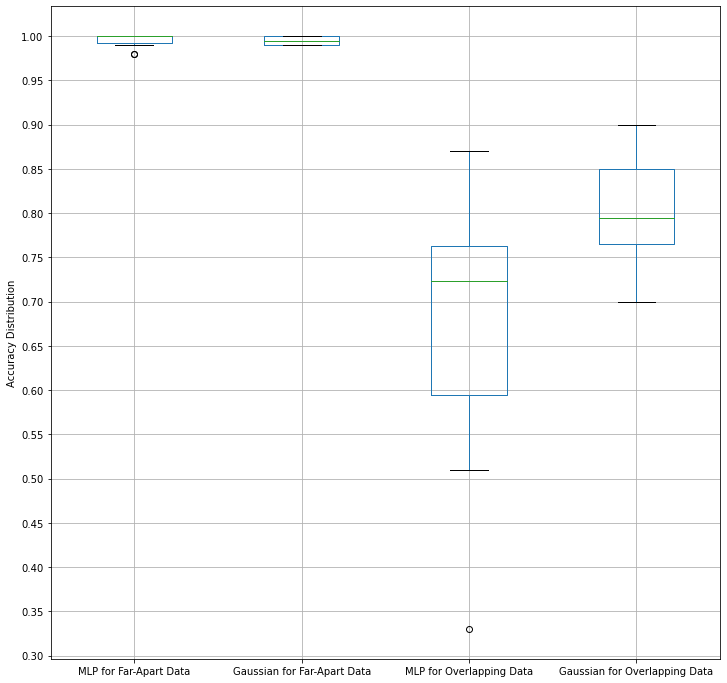

In [477]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(12,12))
y_major_locator=MultipleLocator(0.05)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
data = pd.DataFrame({
    "MLP for Far-Apart Data":scores1,
    "Gaussian for Far-Apart Data":scores3,
    "MLP for Overlapping Data":scores2,
    "Gaussian for Overlapping Data":scores4,
})

data.boxplot()
plt.ylabel("Accuracy Distribution")
plt.savefig("Accuracy Distribution.png")

In [480]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.funct import Plt_classifier,Plt_confusion_matrix
Xcontours1 = X_train1
Xcontours2 = X_test1
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="m", s=2)
ax.scatter(X2[:,0], X2[:,1], c="c", s=2)
ax.set_xlim(-5,8)
ax.set_ylim(-5,10)
Plt_classifier(classifier,features_train,labels_train)
plt.savefig("classBoundary 1.png")

ModuleNotFoundError: No module named 'sklearn.funct'

In [482]:
X_para_train = X_train2
X_para_test = X_test2
y_para_train = y_onehot_train2
y_para_test = y_onehot_test2

In [484]:
#Training  neural network
#
from sklearn.neural_network import MLPClassifier
clf_para1 = MLPClassifier(max_iter=10000)
clf_para1.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred1_train = clf_para1.predict(X_para_train)
print(accuracy_score(y_para_train, y_pred1_train))

N_para_train = X_para_train.shape[0]
predicted1_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    predicted1_class_train[j] = (1+np.argmax(y_pred1_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,predicted1_class_train))

print(clf_para1.score(X_para_test, y_para_test))
print(clf_para1.n_iter_)
print(clf_para1.loss_)
print(clf_para1.out_activation_)


0.7627627627627628
Confusion Matrix:
[[375  13  33]
 [ 58 140  36]
 [ 49  17 278]]
0.7577577577577578
653
0.8598994250718662
logistic


In [522]:
from sklearn.neural_network import MLPClassifier
clf_para5 = MLPClassifier(activation = 'relu',
                          #identify：f(x)=x; logistic: f(x)=1/(1+exp(-x))
                          #tanh: f(x)=tanh(x); f(x)=max(0,x)
                          
                          alpha = 0.0001,
                          #Regularization
                          
                          batch_size = 'auto',
                          #Size of Random Optimizer
                          
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          #Exponential Decay Rate of First Order Moment Vector
                          
                          early_stopping = False,
                          #If stopping when scores do not improve
                          
                          epsilon = 1e-08,
                          #Value of Adam Stability
                          
                          hidden_layer_sizes = (100,),
                          #Number of Neurons in the ith Hidden Layer
                          
                          learning_rate = 'constant',
                          #Weights Updating Category
                          
                          learning_rate_init = 0.0001,
                          #Weights Updating Step Length
                          
                          max_iter = 10000,
                          momentum = 0.9,
                          #Momentum of Gradient Descent Updating
                          
                          nesterovs_momentum = True,
                          power_t = 0.5,
                          #Index of inverse scaling learning rate
                          
                          random_state = None,
                          #The State or Seed of the Random Number Generator
                          
                          shuffle = True,
                          #If shuffling the samples in each iteration
                          
                          solver = 'adam',
                          #Solver for Weight Optimization
                          
                          tol = 0.0001,
                          #Tolerance Optimization(Commanding Convergence)
                          
                          validation_fraction = 0.1,
                          #Proportion of training data when early stop happens
                          
                          verbose = False,
                          #Print progress message to stdout
                          
                          warm_start = False
                          #Reuse the last called solution to suit initialization
                         )
                          
clf_para5.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred5_train = clf_para5.predict(X_para_train)
print(accuracy_score(y_para_train, y_pred5_train))

N_para_train = X_para_train.shape[0]
predicted5_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    predicted5_class_train[j] = (1+np.argmax(y_pred5_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,predicted5_class_train))

print(clf_para5.score(X_para_test, y_para_test))
print(clf_para5.n_iter_)
print(clf_para5.loss_)
print(clf_para5.out_activation_)

0.7117117117117117
Confusion Matrix:
[[385   8  28]
 [ 95 112  27]
 [ 60  19 265]]
0.6896896896896897
1529
0.9541521243114215
logistic


In [489]:
#Training  neural network
#
from sklearn.neural_network import MLPClassifier
clf_para1 = MLPClassifier(activation = 'relu',
                          #identify：f(x)=x; logistic: f(x)=1/(1+exp(-x))
                          #tanh: f(x)=tanh(x); f(x)=max(0,x)
                          
                          alpha = 0.0001,
                          #Regularization
                          
                          batch_size = 'auto',
                          #Size of Random Optimizer
                          
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          #Exponential Decay Rate of First Order Moment Vector
                          
                          early_stopping = False,
                          #If stopping when scores do not improve
                          
                          epsilon = 1e-08,
                          #Value of Adam Stability
                          
                          hidden_layer_sizes = (100,),
                          #Number of Neurons in the ith Hidden Layer
                          
                          learning_rate = 'constant',
                          #Weights Updating Category
                          
                          learning_rate_init = 0.001,
                          #Weights Updating Step Length
                          
                          max_iter = 10000,
                          momentum = 0.9,
                          #Momentum of Gradient Descent Updating
                          
                          nesterovs_momentum = True,
                          power_t = 0.5,
                          #Index of inverse scaling learning rate
                          
                          random_state = None,
                          #The State or Seed of the Random Number Generator
                          
                          shuffle = True,
                          #If shuffling the samples in each iteration
                          
                          solver = 'adam',
                          #Solver for Weight Optimization
                          
                          tol = 0.0001,
                          #Tolerance Optimization(Commanding Convergence)
                          
                          validation_fraction = 0.1,
                          #Proportion of training data when early stop happens
                          
                          verbose = False,
                          #Print progress message to stdout
                          
                          warm_start = False
                          #Reuse the last called solution to suit initialization)
clf_para1.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred1_train = clf_para1.predict(X_para_train)
print(accuracy_score(y_para_train, y_pred1_train))

N_para_train = X_para_train.shape[0]
predicted1_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    predicted1_class_train[j] = (1+np.argmax(y_pred1_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,predicted1_class_train))

print(clf_para1.score(X_para_test, y_para_test))
print(clf_para1.n_iter_)
print(clf_para1.loss_)
print(clf_para1.out_activation_)

0.7557557557557557
Confusion Matrix:
[[377  11  33]
 [ 68 130  36]
 [ 51  14 279]]
0.7487487487487487
785
0.8604027563913869
logistic


In [521]:
from sklearn.neural_network import MLPClassifier
clf_para2 = MLPClassifier(activation = 'relu',
                          #identify：f(x)=x; logistic: f(x)=1/(1+exp(-x))
                          #tanh: f(x)=tanh(x); f(x)=max(0,x)
                          
                          alpha = 0.0001,
                          #Regularization
                          
                          batch_size = 'auto',
                          #Size of Random Optimizer
                          
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          #Exponential Decay Rate of First Order Moment Vector
                          
                          early_stopping = False,
                          #If stopping when scores do not improve
                          
                          epsilon = 1e-08,
                          #Value of Adam Stability
                          
                          hidden_layer_sizes = (100,),
                          #Number of Neurons in the ith Hidden Layer
                          
                          learning_rate = 'constant',
                          #Weights Updating Category
                          
                          learning_rate_init = 0.01,
                          #Weights Updating Step Length
                          
                          max_iter = 10000,
                          momentum = 0.9,
                          #Momentum of Gradient Descent Updating
                          
                          nesterovs_momentum = True,
                          power_t = 0.5,
                          #Index of inverse scaling learning rate
                          
                          random_state = None,
                          #The State or Seed of the Random Number Generator
                          
                          shuffle = True,
                          #If shuffling the samples in each iteration
                          
                          solver = 'adam',
                          #Solver for Weight Optimization
                          
                          tol = 0.0001,
                          #Tolerance Optimization(Commanding Convergence)
                          
                          validation_fraction = 0.1,
                          #Proportion of training data when early stop happens
                          
                          verbose = False,
                          #Print progress message to stdout
                          
                          warm_start = False
                          #Reuse the last called solution to suit initialization
                         )
                          
clf_para2.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred2_train = clf_para2.predict(X_para_train)
print(accuracy_score(y_para_train, y_pred2_train))

N_para_train = X_para_train.shape[0]
predicted2_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    predicted2_class_train[j] = (1+np.argmax(y_pred2_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,predicted2_class_train))

print(clf_para2.score(X_para_test, y_para_test))
print(clf_para2.n_iter_)
print(clf_para2.loss_)
print(clf_para2.out_activation_)

0.7657657657657657
Confusion Matrix:
[[378  16  27]
 [ 50 156  28]
 [ 54  26 264]]
0.7587587587587588
147
0.8599927628910142
logistic


In [520]:
from sklearn.neural_network import MLPClassifier
clf_para2 = MLPClassifier(activation = 'relu',
                          #identify：f(x)=x; logistic: f(x)=1/(1+exp(-x))
                          #tanh: f(x)=tanh(x); f(x)=max(0,x)
                          
                          alpha = 0.0001,
                          #Regularization
                          
                          batch_size = 'auto',
                          #Size of Random Optimizer
                          
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          #Exponential Decay Rate of First Order Moment Vector
                          
                          early_stopping = False,
                          #If stopping when scores do not improve
                          
                          epsilon = 1e-08,
                          #Value of Adam Stability
                          
                          hidden_layer_sizes = (100,),
                          #Number of Neurons in the ith Hidden Layer
                          
                          learning_rate = 'constant',
                          #Weights Updating Category
                          
                          learning_rate_init = 0.1,
                          #Weights Updating Step Length
                          
                          max_iter = 10000,
                          momentum = 0.9,
                          #Momentum of Gradient Descent Updating
                          
                          nesterovs_momentum = True,
                          power_t = 0.5,
                          #Index of inverse scaling learning rate
                          
                          random_state = None,
                          #The State or Seed of the Random Number Generator
                          
                          shuffle = True,
                          #If shuffling the samples in each iteration
                          
                          solver = 'adam',
                          #Solver for Weight Optimization
                          
                          tol = 0.0001,
                          #Tolerance Optimization(Commanding Convergence)
                          
                          validation_fraction = 0.1,
                          #Proportion of training data when early stop happens
                          
                          verbose = False,
                          #Print progress message to stdout
                          
                          warm_start = False
                          #Reuse the last called solution to suit initialization
                         )
                          
clf_para2.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred2_train = clf_para2.predict(X_para_train)
print(accuracy_score(y_para_train, y_pred2_train))

N_para_train = X_para_train.shape[0]
predicted2_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    predicted2_class_train[j] = (1+np.argmax(y_pred2_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,predicted2_class_train))

print(clf_para2.score(X_para_test, y_para_test))
print(clf_para2.n_iter_)
print(clf_para2.loss_)
print(clf_para2.out_activation_)

0.7547547547547547
Confusion Matrix:
[[372  24  25]
 [ 52 158  24]
 [ 56  34 254]]
0.7227227227227228
22
1.0283541865876706
logistic


In [519]:
from sklearn.neural_network import MLPClassifier
clf_para3 = MLPClassifier(activation = 'relu',
                          #identify：f(x)=x; logistic: f(x)=1/(1+exp(-x))
                          #tanh: f(x)=tanh(x); f(x)=max(0,x)
                          
                          alpha = 0.0001,
                          #Regularization
                          
                          batch_size = 'auto',
                          #Size of Random Optimizer
                          
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          #Exponential Decay Rate of First Order Moment Vector
                          
                          early_stopping = False,
                          #If stopping when scores do not improve
                          
                          epsilon = 1e-08,
                          #Value of Adam Stability
                          
                          hidden_layer_sizes = (100,),
                          #Number of Neurons in the ith Hidden Layer
                          
                          learning_rate = 'constant',
                          #Weights Updating Category
                          
                          learning_rate_init = 1,
                          #Weights Updating Step Length
                          
                          max_iter = 10000,
                          momentum = 0.9,
                          #Momentum of Gradient Descent Updating
                          
                          nesterovs_momentum = True,
                          power_t = 0.5,
                          #Index of inverse scaling learning rate
                          
                          random_state = None,
                          #The State or Seed of the Random Number Generator
                          
                          shuffle = True,
                          #If shuffling the samples in each iteration
                          
                          solver = 'adam',
                          #Solver for Weight Optimization
                          
                          tol = 0.0001,
                          #Tolerance Optimization(Commanding Convergence)
                          
                          validation_fraction = 0.1,
                          #Proportion of training data when early stop happens
                          
                          verbose = False,
                          #Print progress message to stdout
                          
                          warm_start = False
                          #Reuse the last called solution to suit initialization
                         )
                          
clf_para3.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred3_train = clf_para3.predict(X_para_train)
print(accuracy_score(y_para_train, y_pred3_train))

N_para_train = X_para_train.shape[0]
predicted3_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    predicted3_class_train[j] = (1+np.argmax(y_pred3_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,predicted3_class_train))

print(clf_para3.score(X_para_test, y_para_test))
print(clf_para3.n_iter_)
print(clf_para3.loss_)
print(clf_para3.out_activation_)

0.5625625625625625
Confusion Matrix:
[[296   0 125]
 [  8   0 226]
 [  7   0 337]]
0.5295295295295295
52
1.4398575377063494
logistic


In [515]:
from sklearn.neural_network import MLPClassifier
clf_para4 = MLPClassifier(activation = 'relu',
                          #identify：f(x)=x; logistic: f(x)=1/(1+exp(-x))
                          #tanh: f(x)=tanh(x); f(x)=max(0,x)
                          
                          alpha = 0.0001,
                          #Regularization
                          
                          batch_size = 'auto',
                          #Size of Random Optimizer
                          
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          #Exponential Decay Rate of First Order Moment Vector
                          
                          early_stopping = False,
                          #If stopping when scores do not improve
                          
                          epsilon = 1e-08,
                          #Value of Adam Stability
                          
                          hidden_layer_sizes = (100,),
                          #Number of Neurons in the ith Hidden Layer
                          
                          learning_rate = 'constant',
                          #Weights Updating Category
                          
                          learning_rate_init = 10,
                          #Weights Updating Step Length
                          
                          max_iter = 10000,
                          momentum = 0.9,
                          #Momentum of Gradient Descent Updating
                          
                          nesterovs_momentum = True,
                          power_t = 0.5,
                          #Index of inverse scaling learning rate
                          
                          random_state = None,
                          #The State or Seed of the Random Number Generator
                          
                          shuffle = True,
                          #If shuffling the samples in each iteration
                          
                          solver = 'adam',
                          #Solver for Weight Optimization
                          
                          tol = 0.0001,
                          #Tolerance Optimization(Commanding Convergence)
                          
                          validation_fraction = 0.1,
                          #Proportion of training data when early stop happens
                          
                          verbose = False,
                          #Print progress message to stdout
                          
                          warm_start = False
                          #Reuse the last called solution to suit initialization
                         )
                          
clf_para4.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred4_train = clf_para4.predict(X_para_train)
print(accuracy_score(y_para_train, y_pred4_train))

N_para_train = X_para_train.shape[0]
predicted4_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    predicted4_class_train[j] = (1+np.argmax(y_pred4_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,predicted4_class_train))

print(clf_para4.score(X_para_test, y_para_test))
print(clf_para4.n_iter_)
print(clf_para4.loss_)
print(clf_para4.out_activation_)

0.005005005005005005
Confusion Matrix:
[[421   0   0]
 [234   0   0]
 [344   0   0]]
0.004004004004004004
39
2.180749957995757
logistic


In [507]:
from sklearn.neural_network import MLPClassifier
clf_para4 = MLPClassifier(activation = 'relu',
                          #identify：f(x)=x; logistic: f(x)=1/(1+exp(-x))
                          #tanh: f(x)=tanh(x); f(x)=max(0,x)
                          
                          alpha = 0.0001,
                          #Regularization
                          
                          batch_size = 'auto',
                          #Size of Random Optimizer
                          
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          #Exponential Decay Rate of First Order Moment Vector
                          
                          early_stopping = False,
                          #If stopping when scores do not improve
                          
                          epsilon = 1e-08,
                          #Value of Adam Stability
                          
                          hidden_layer_sizes = (100,),
                          #Number of Neurons in the ith Hidden Layer
                          
                          learning_rate = 'constant',
                          #Weights Updating Category
                          
                          learning_rate_init = 10,
                          #Weights Updating Step Length
                          
                          max_iter = 10000,
                          momentum = 0.9,
                          #Momentum of Gradient Descent Updating
                          
                          nesterovs_momentum = True,
                          power_t = 0.5,
                          #Index of inverse scaling learning rate
                          
                          random_state = None,
                          #The State or Seed of the Random Number Generator
                          
                          shuffle = True,
                          #If shuffling the samples in each iteration
                          
                          solver = 'adam',
                          #Solver for Weight Optimization
                          
                          tol = 0.0001,
                          #Tolerance Optimization(Commanding Convergence)
                          
                          validation_fraction = 0.1,
                          #Proportion of training data when early stop happens
                          
                          verbose = False,
                          #Print progress message to stdout
                          
                          warm_start = False
                          #Reuse the last called solution to suit initialization
                         )
                          
clf_para4.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred4_train = clf_para4.predict(X_para_train)
print(accuracy_score(y_para_train, y_pred4_train))

N_para_train = X_para_train.shape[0]
predicted4_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    predicted4_class_train[j] = (1+np.argmax(y_pred4_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,predicted4_class_train))

print(clf_para4.score(X_para_test, y_para_test))
print(clf_para4.n_iter_)
print(clf_para4.loss_)
print(clf_para4.out_activation_)

0.7127127127127127
Confusion Matrix:
[[380  12  29]
 [ 95 112  27]
 [ 61  18 265]]
0.6886886886886887
1422
0.963992694327896
logistic


In [528]:
from sklearn.neural_network import MLPClassifier
clf_para6 = MLPClassifier(activation = 'relu',
                          #identify：f(x)=x; logistic: f(x)=1/(1+exp(-x))
                          #tanh: f(x)=tanh(x); f(x)=max(0,x)
                          
                          alpha = 0.0001,
                          #Regularization
                          
                          batch_size = 'auto',
                          #Size of Random Optimizer
                          
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          #Exponential Decay Rate of First Order Moment Vector
                          
                          early_stopping = False,
                          #If stopping when scores do not improve
                          
                          epsilon = 1e-08,
                          #Value of Adam Stability
                          
                          hidden_layer_sizes = (100,),
                          #Number of Neurons in the ith Hidden Layer
                          
                          learning_rate = 'constant',
                          #Weights Updating Category
                          
                          learning_rate_init = 0.005,
                          #Weights Updating Step Length
                          
                          max_iter = 10000,
                          momentum = 0.9,
                          #Momentum of Gradient Descent Updating
                          
                          nesterovs_momentum = True,
                          power_t = 0.5,
                          #Index of inverse scaling learning rate
                          
                          random_state = None,
                          #The State or Seed of the Random Number Generator
                          
                          shuffle = True,
                          #If shuffling the samples in each iteration
                          
                          solver = 'adam',
                          #Solver for Weight Optimization
                          
                          tol = 0.0001,
                          #Tolerance Optimization(Commanding Convergence)
                          
                          validation_fraction = 0.1,
                          #Proportion of training data when early stop happens
                          
                          verbose = False,
                          #Print progress message to stdout
                          
                          warm_start = False
                          #Reuse the last called solution to suit initialization
                         )
                          
clf_para6.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred6_train = clf_para6.predict(X_para_train)
print(accuracy_score(y_para_train, y_pred6_train))

N_para_train = X_para_train.shape[0]
predicted6_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    predicted6_class_train[j] = (1+np.argmax(y_pred6_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,predicted6_class_train))

print(clf_para6.score(X_para_test, y_para_test))
print(clf_para6.n_iter_)
print(clf_para6.loss_)
print(clf_para6.out_activation_)

0.7717717717717718
Confusion Matrix:
[[380  14  27]
 [ 58 147  29]
 [ 52  19 273]]
0.7617617617617618
200
0.8588383866977284
logistic


In [549]:
from sklearn.neural_network import MLPClassifier
clf_para7 = MLPClassifier(activation = 'relu',
                          #identify：f(x)=x; logistic: f(x)=1/(1+exp(-x))
                          #tanh: f(x)=tanh(x); f(x)=max(0,x)
                          
                          alpha = 0.0001,
                          #Regularization
                          
                          batch_size = 'auto',
                          #Size of Random Optimizer
                          
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          #Exponential Decay Rate of First Order Moment Vector
                          
                          early_stopping = False,
                          #If stopping when scores do not improve
                          
                          epsilon = 1e-08,
                          #Value of Adam Stability
                          
                          hidden_layer_sizes = (100,),
                          #Number of Neurons in the ith Hidden Layer
                          
                          learning_rate = 'constant',
                          #Weights Updating Category
                          
                          learning_rate_init = 0.05,
                          #Weights Updating Step Length
                          
                          max_iter = 10000,
                          momentum = 0.9,
                          #Momentum of Gradient Descent Updating
                          
                          nesterovs_momentum = True,
                          power_t = 0.5,
                          #Index of inverse scaling learning rate
                          
                          random_state = None,
                          #The State or Seed of the Random Number Generator
                          
                          shuffle = True,
                          #If shuffling the samples in each iteration
                          
                          solver = 'adam',
                          #Solver for Weight Optimization
                          
                          tol = 0.0001,
                          #Tolerance Optimization(Commanding Convergence)
                          
                          validation_fraction = 0.1,
                          #Proportion of training data when early stop happens
                          
                          verbose = False,
                          #Print progress message to stdout
                          
                          warm_start = False
                          #Reuse the last called solution to suit initialization
                         )
                          
clf_para7.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred7_train = clf_para7.predict(X_para_train)
print(accuracy_score(y_para_train, y_pred7_train))

N_para_train = X_para_train.shape[0]
predicted7_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    predicted7_class_train[j] = (1+np.argmax(y_pred7_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,predicted7_class_train))

print(clf_para7.score(X_para_test, y_para_test))
print(clf_para7.n_iter_)
print(clf_para7.loss_)
print(clf_para7.out_activation_)

0.7357357357357357
Confusion Matrix:
[[356  15  50]
 [ 74 104  56]
 [ 25   6 313]]
0.7117117117117117
35
0.9596723977391678
logistic


In [605]:
#Training  neural network
#
from sklearn.neural_network import MLPClassifier
clf_solverlbfgs = MLPClassifier(activation = 'relu',
                          #identify：f(x)=x; logistic: f(x)=1/(1+exp(-x))
                          #tanh: f(x)=tanh(x); f(x)=max(0,x)
                          
                          alpha = 0.0001,
                          #Regularization
                          
                          batch_size = 'auto',
                          #Size of Random Optimizer
                          
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          #Exponential Decay Rate of First Order Moment Vector
                          
                          early_stopping = False,
                          #If stopping when scores do not improve
                          
                          epsilon = 1e-08,
                          #Value of Adam Stability
                          
                          hidden_layer_sizes = (100,),
                          #Number of Neurons in the ith Hidden Layer
                          
                          learning_rate = 'constant',
                          #Weights Updating Category
                          
                          learning_rate_init = 0.001,
                          #Weights Updating Step Length
                          
                          max_iter = 10000,
                          momentum = 0.9,
                          #Momentum of Gradient Descent Updating
                          
                          nesterovs_momentum = True,
                          power_t = 0.5,
                          #Index of inverse scaling learning rate
                          
                          random_state = None,
                          #The State or Seed of the Random Number Generator
                          
                          shuffle = True,
                          #If shuffling the samples in each iteration
                          
                          solver = 'lbfgs',
                          #Solver for Weight Optimization
                          
                          tol = 0.0001,
                          #Tolerance Optimization(Commanding Convergence)
                          
                          validation_fraction = 0.1,
                          #Proportion of training data when early stop happens
                          
                          verbose = False,
                          #Print progress message to stdout
                          
                          warm_start = False
                          #Reuse the last called solution to suit initialization)
                               )
clf_solverlbfgs.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_solverlbfgs_train = clf_solverlbfgs.predict(X_para_train)
print(accuracy_score(y_para_train, y_solverlbfgs_train))

N_para_train = X_para_train.shape[0]
solverlbfgs_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    solverlbfgs_class_train[j] = (1+np.argmax(y_solverlbfgs_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,solverlbfgs_class_train))

print(clf_solverlbfgs.score(X_para_test, y_para_test))
print(clf_solverlbfgs.n_iter_)
print(clf_solverlbfgs.loss_)
print(clf_solverlbfgs.out_activation_)

0.7797797797797797
Confusion Matrix:
[[376  17  28]
 [ 49 150  35]
 [ 50  14 280]]
0.7577577577577578
1271
0.8168117754411701
logistic


In [614]:
#Training  neural network
#
from sklearn.neural_network import MLPClassifier
clf_solversgd = MLPClassifier(activation = 'relu',
                          #identify：f(x)=x; logistic: f(x)=1/(1+exp(-x))
                          #tanh: f(x)=tanh(x); f(x)=max(0,x)
                          
                          alpha = 0.0001,
                          #Regularization
                          
                          batch_size = 'auto',
                          #Size of Random Optimizer
                          
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          #Exponential Decay Rate of First Order Moment Vector
                          
                          early_stopping = False,
                          #If stopping when scores do not improve
                          
                          epsilon = 1e-08,
                          #Value of Adam Stability
                          
                          hidden_layer_sizes = (100,),
                          #Number of Neurons in the ith Hidden Layer
                          
                          learning_rate = 'constant',
                          #Weights Updating Category
                          
                          learning_rate_init = 0.001,
                          #Weights Updating Step Length
                          
                          max_iter = 10000,
                          momentum = 0.9,
                          #Momentum of Gradient Descent Updating
                          
                          nesterovs_momentum = True,
                          power_t = 0.5,
                          #Index of inverse scaling learning rate
                          
                          random_state = None,
                          #The State or Seed of the Random Number Generator
                          
                          shuffle = True,
                          #If shuffling the samples in each iteration
                          
                          solver = 'sgd',
                          #Solver for Weight Optimization
                          
                          tol = 0.0001,
                          #Tolerance Optimization(Commanding Convergence)
                          
                          validation_fraction = 0.1,
                          #Proportion of training data when early stop happens
                          
                          verbose = False,
                          #Print progress message to stdout
                          
                          warm_start = False
                          #Reuse the last called solution to suit initialization)
                             )
clf_solversgd.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_solversgd_train = clf_solversgd.predict(X_para_train)
print(accuracy_score(y_para_train, y_solversgd_train))

N_para_train = X_para_train.shape[0]
solversgd_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    solversgd_class_train[j] = (1+np.argmax(y_solversgd_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,solversgd_class_train))

print(clf_solversgd.score(X_para_test, y_para_test))
print(clf_solversgd.n_iter_)
print(clf_solversgd.loss_)
print(clf_solversgd.out_activation_)

0.7107107107107107
Confusion Matrix:
[[378  12  31]
 [ 97 110  27]
 [ 61  18 265]]
0.6916916916916916
1066
0.9551972225329738
logistic


In [623]:
#Training  neural network
#
from sklearn.neural_network import MLPClassifier
clf_solveradam = MLPClassifier(activation = 'relu',
                          #identify：f(x)=x; logistic: f(x)=1/(1+exp(-x))
                          #tanh: f(x)=tanh(x); f(x)=max(0,x)
                          
                          alpha = 0.0001,
                          #Regularization
                          
                          batch_size = 'auto',
                          #Size of Random Optimizer
                          
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          #Exponential Decay Rate of First Order Moment Vector
                          
                          early_stopping = False,
                          #If stopping when scores do not improve
                          
                          epsilon = 1e-08,
                          #Value of Adam Stability
                          
                          hidden_layer_sizes = (100,),
                          #Number of Neurons in the ith Hidden Layer
                          
                          learning_rate = 'constant',
                          #Weights Updating Category
                          
                          learning_rate_init = 0.001,
                          #Weights Updating Step Length
                          
                          max_iter = 10000,
                          momentum = 0.9,
                          #Momentum of Gradient Descent Updating
                          
                          nesterovs_momentum = True,
                          power_t = 0.5,
                          #Index of inverse scaling learning rate
                          
                          random_state = None,
                          #The State or Seed of the Random Number Generator
                          
                          shuffle = True,
                          #If shuffling the samples in each iteration
                          
                          solver = 'adam',
                          #Solver for Weight Optimization
                          
                          tol = 0.0001,
                          #Tolerance Optimization(Commanding Convergence)
                          
                          validation_fraction = 0.1,
                          #Proportion of training data when early stop happens
                          
                          verbose = False,
                          #Print progress message to stdout
                          
                          warm_start = False
                          #Reuse the last called solution to suit initialization)
                              )
clf_solveradam.fit(X_para_train, y_para_train)

#Prediciton, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_solveradam_train = clf_solveradam.predict(X_para_train)
print(accuracy_score(y_para_train, y_solveradam_train))

N_para_train = X_para_train.shape[0]
solveradam_class_train = np.zeros((N_para_train,1))
for j in range(N_para_train):
    solveradam_class_train[j] = (1+np.argmax(y_solveradam_train[j,:])).astype(int)
    
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train2,solveradam_class_train))

print(clf_solveradam.score(X_para_test, y_para_test))
print(clf_solveradam.n_iter_)
print(clf_solveradam.loss_)
print(clf_solveradam.out_activation_)

0.7657657657657657
Confusion Matrix:
[[380  12  29]
 [ 67 138  29]
 [ 54  17 273]]
0.7527527527527528
745
0.8645148614842363
logistic
